In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data = pd.read_csv('stroke_data.csv')

In [3]:
#viewing the first five columns of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#dropping the id and stroke column of the dataset
data = data.drop(['id', 'stroke'], axis = 1)

In [5]:
#viewing the data again
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [6]:
#basic summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [7]:
#dropping the rows with missing values in the bmi column
data = data.dropna(subset = 'bmi')

In [8]:
#identifying the categorical and numerical valueskjuy 
categorical_cols = data.select_dtypes(include = ['object']).columns.tolist()
numerical_cols = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [9]:
#encoding the categorical columns
le = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = le[col].fit_transform(data[col])

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [11]:
#scaling the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [12]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.070138,-0.318067,4.381968,1,2,1,2.777698,0.981345,1
2,1,1.646563,-0.318067,4.381968,1,2,0,0.013842,0.459269,2
3,0,0.272012,-0.318067,-0.228208,1,2,1,1.484132,0.701207,3
4,0,1.602222,3.143994,-0.228208,1,3,0,1.549193,-0.623083,2
5,1,1.690903,-0.318067,-0.228208,1,2,1,1.821368,0.013595,1


In [13]:
#applying the KMeans algorithm and evaluating using the elbow method and silhouette score
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(data, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(data, kmeans.labels_))


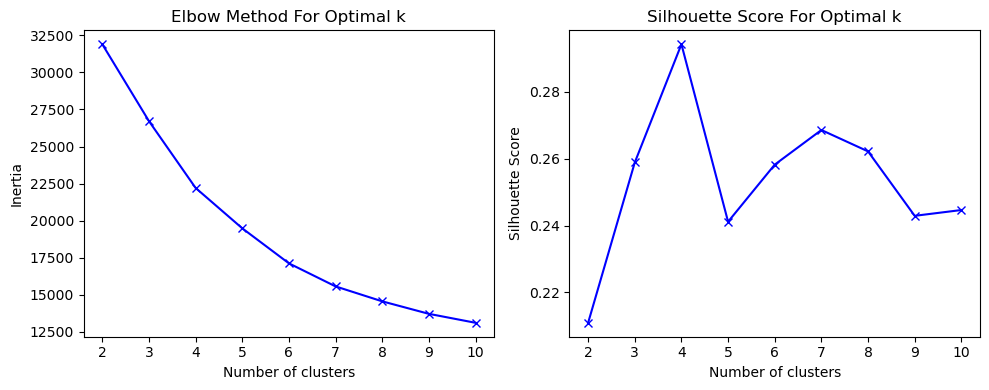

In [14]:
# Plot the elbow method
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()


In [16]:
# Determine the best number of clusters using the silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")

# Fit the final KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data)

# Add the cluster labels to the original data
data['Cluster'] = kmeans_optimal.labels_

# Evaluate the final clustering
final_inertia = kmeans_optimal.inertia_
final_silhouette_score = silhouette_score(data, kmeans_optimal.labels_)
final_davies_bouldin_score = davies_bouldin_score(data, kmeans_optimal.labels_)
final_calinski_harabasz_score = calinski_harabasz_score(data, kmeans_optimal.labels_)

print(f"Final Inertia: {final_inertia}")
print(f"Final Silhouette Score: {final_silhouette_score}")
print(f"Final Davies-Bouldin Index: {final_davies_bouldin_score}")
print(f"Final Calinski-Harabasz Index: {final_calinski_harabasz_score}")

The optimal number of clusters based on silhouette score is: 4
Final Inertia: 22207.869060079927
Final Silhouette Score: 0.3662068601325539
Final Davies-Bouldin Index: 1.0590475901312153
Final Calinski-Harabasz Index: 1529.5578363584632


#### The silhouette score is approximately 0.4 which is not quite encouraging. Let's apply a dimensionality reduction the data to enhance the model's performance

In [17]:
#applying PCA and keeping the top 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

#applying KMeans on the reduced data
inertia_pca = []
silhouette_scores_pca = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia_pca.append(kmeans.inertia_)
    silhouette_scores_pca.append(silhouette_score(pca_data, kmeans.labels_))
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(data, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(data, kmeans.labels_))

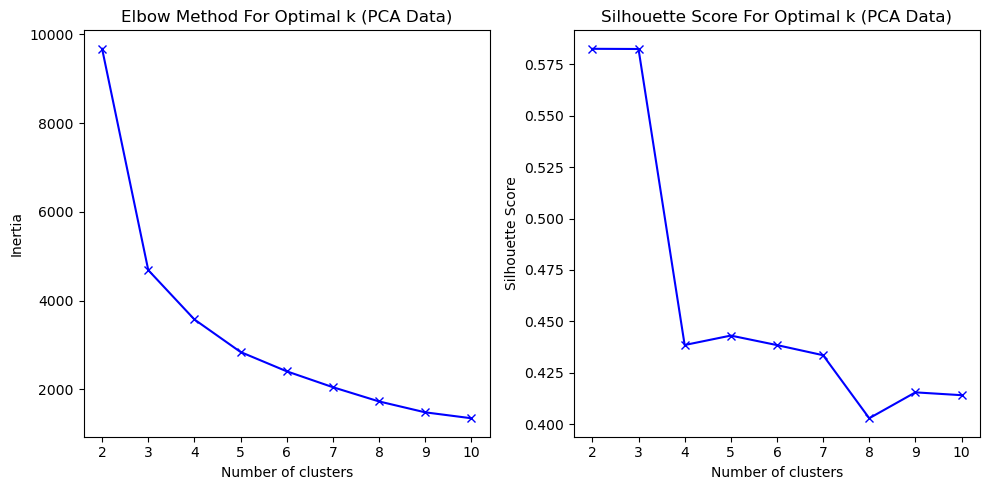

In [18]:
#plotingt the elbow method for PCA data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (PCA Data)')

#plotting the silhouette scores for PCA data
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k (PCA Data)')

plt.tight_layout()
plt.show()

In [19]:
#determining the best number of clusters using the silhouette score for PCA data
optimal_k_pca = K[np.argmax(silhouette_scores_pca)]
print(f"The optimal number of clusters based on silhouette score for PCA data is: {optimal_k_pca}")

# Fit the final KMeans model with the optimal number of clusters on PCA data
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)
kmeans_optimal_pca.fit(pca_data)

# Add the cluster labels to the original data
data['Cluster_PCA'] = kmeans_optimal_pca.labels_

# Evaluate the final clustering for PCA data
final_inertia_pca = kmeans_optimal_pca.inertia_
final_silhouette_score_pca = silhouette_score(pca_data, kmeans_optimal_pca.labels_)
final_davies_bouldin_score_pca = davies_bouldin_score(pca_data, kmeans_optimal_pca.labels_)
final_calinski_harabasz_score_pca = calinski_harabasz_score(pca_data, kmeans_optimal_pca.labels_)

print(f"Final Inertia (PCA): {final_inertia_pca}")
print(f"Final Silhouette Score (PCA): {final_silhouette_score_pca}")
print(f"Final Davies-Bouldin Index (PCA): {final_davies_bouldin_score_pca}")
print(f"Final Calinski-Harabasz Index (PCA): {final_calinski_harabasz_score_pca}")

The optimal number of clusters based on silhouette score for PCA data is: 2
Final Inertia (PCA): 9673.34860301964
Final Silhouette Score (PCA): 0.5824903289747712
Final Davies-Bouldin Index (PCA): 0.5388099701076141
Final Calinski-Harabasz Index (PCA): 5184.04365195941


#### The silhouette score after applying a dimensionality reduction is approximately 0.6 which indicates a good clustering.

### Visualizations

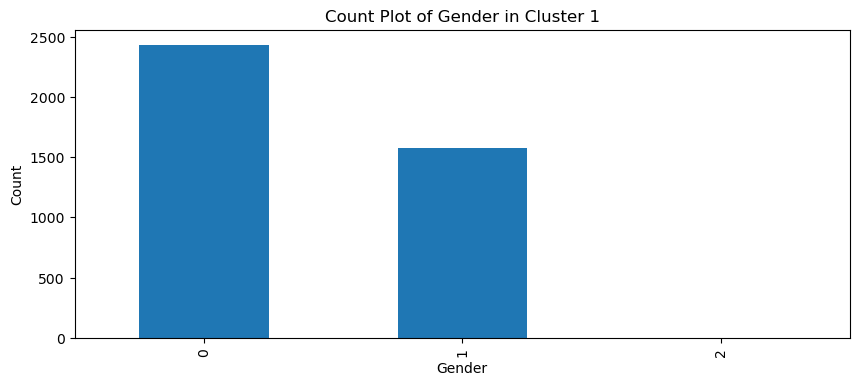

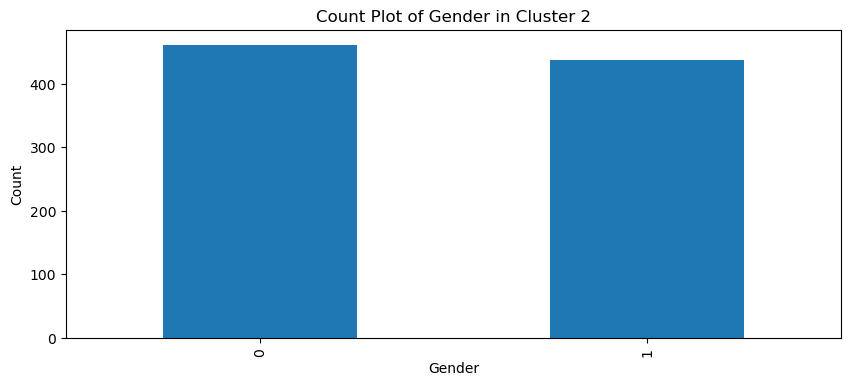

In [27]:
#count plot of gender each cluster
for cluster in range(optimal_k_pca):
    cluster_data = data[data['Cluster_PCA'] == cluster]
    gender_counts = cluster_data['gender'].value_counts()
    plt.figure(figsize=(10, 4))
    gender_counts.plot(kind='bar')
    plt.title(f'Count Plot of Gender in Cluster {cluster + 1}')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

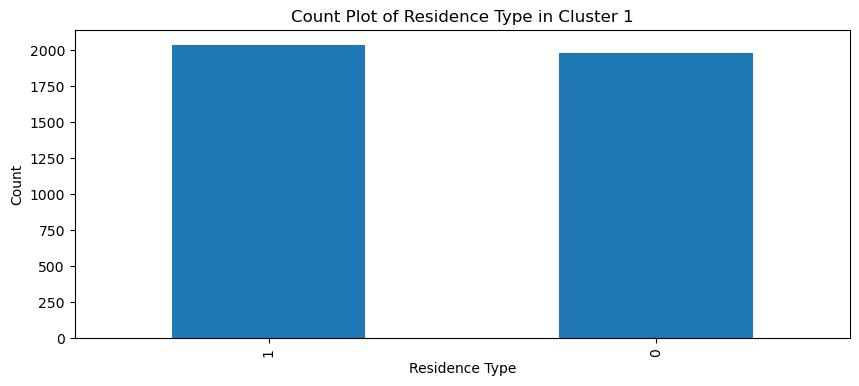

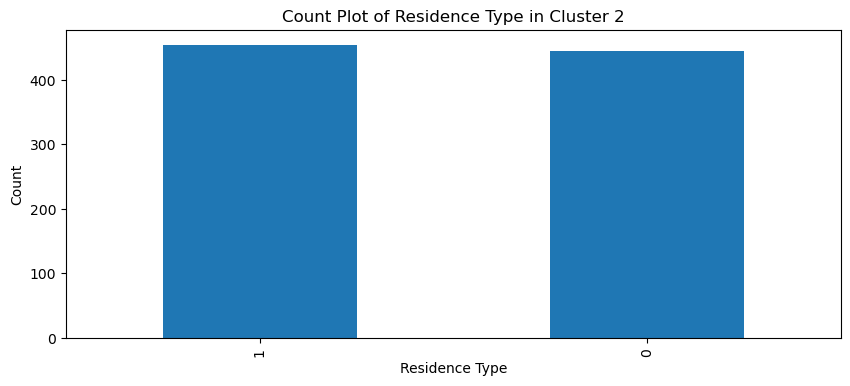

In [28]:
#count plot of residence type in each cluster
for cluster in range(optimal_k_pca):
    cluster_data = data[data['Cluster_PCA'] == cluster]
    gender_counts = cluster_data['Residence_type'].value_counts()
    plt.figure(figsize=(10, 4))
    gender_counts.plot(kind='bar')
    plt.title(f'Count Plot of Residence Type in Cluster {cluster + 1}')
    plt.xlabel('Residence Type')
    plt.ylabel('Count')
    plt.show()

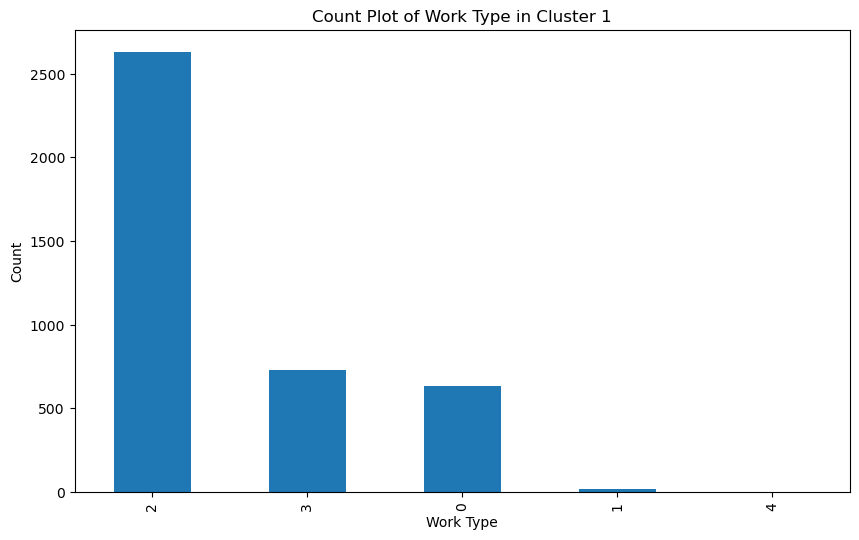

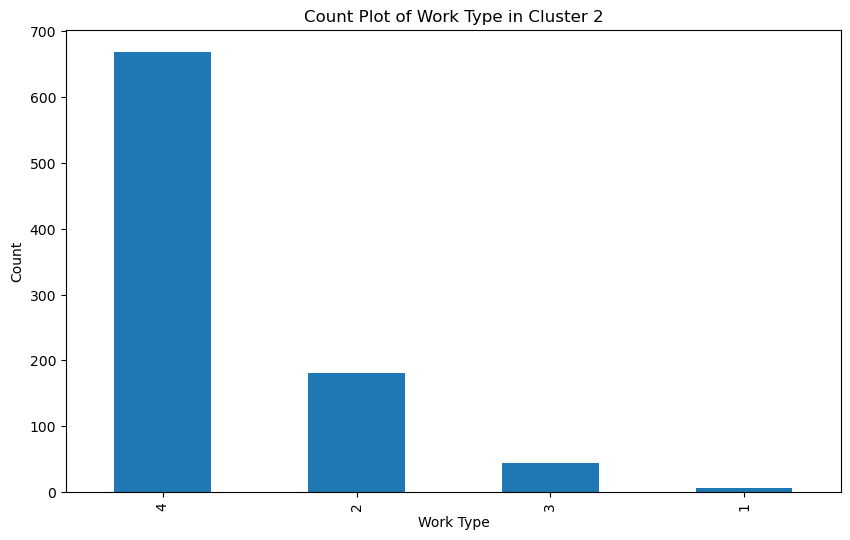

In [29]:
#count plot of work type in each cluster
for cluster in range(optimal_k_pca):
    cluster_data = data[data['Cluster_PCA'] == cluster]
    gender_counts = cluster_data['work_type'].value_counts()
    plt.figure(figsize=(10, 6))
    gender_counts.plot(kind='bar')
    plt.title(f'Count Plot of Work Type in Cluster {cluster + 1}')
    plt.xlabel('Work Type')
    plt.ylabel('Count')
    plt.show()

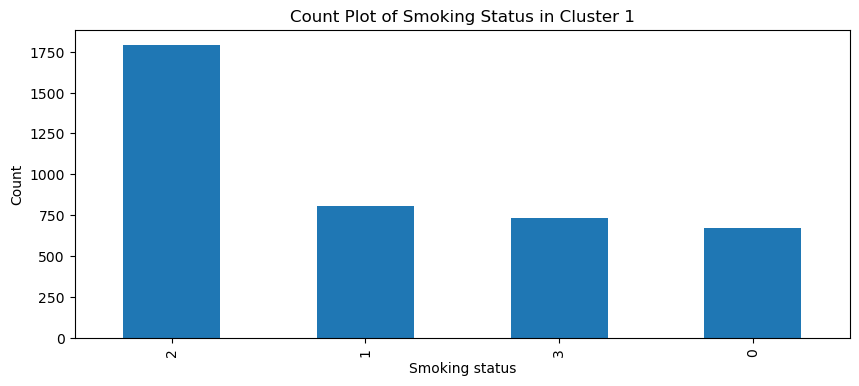

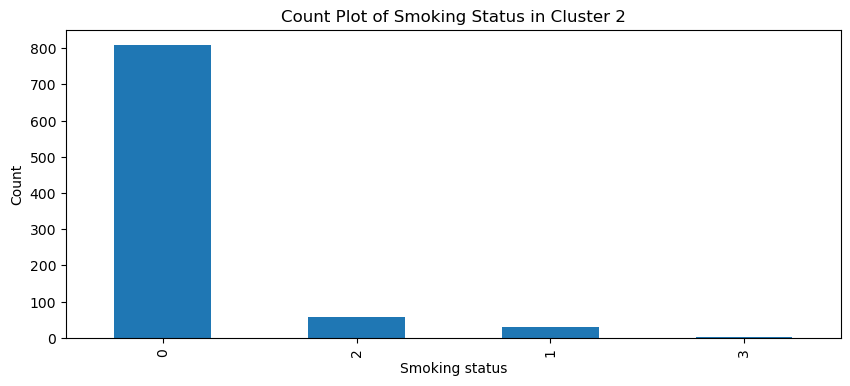

In [30]:
#count plot of smoking status in each cluster
for cluster in range(optimal_k_pca):
    cluster_data = data[data['Cluster_PCA'] == cluster]
    gender_counts = cluster_data['smoking_status'].value_counts()
    plt.figure(figsize=(10, 4))
    gender_counts.plot(kind='bar')
    plt.title(f'Count Plot of Smoking Status in Cluster {cluster + 1}')
    plt.xlabel('Smoking status')
    plt.ylabel('Count')
    plt.show()